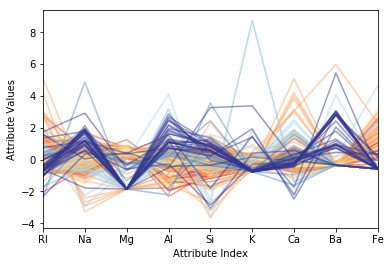

In [2]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot

target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass = pd.read_csv(target_url,header=None, prefix="V")
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

glassNormalized = glass
ncols = len(glassNormalized.columns)
nrows = len(glassNormalized.index)
summary = glassNormalized.describe()
nDataCol = ncols - 1

#normalize except for labels
for i in range(ncols - 1):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    glassNormalized.iloc[:,i:(i + 1)] = (glassNormalized.iloc[:,i:(i + 1)] - mean) / sd

#Plot Parallel Coordinate Graph with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = glassNormalized.iloc[i,1:nDataCol]
    labelColor = glassNormalized.iloc[i,nDataCol]/7.0
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
    
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()